哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dataA = pd.read_csv('A_lvr_land_A.csv')
dataB = pd.read_csv('B_lvr_land_A.csv')
dataE = pd.read_csv('E_lvr_land_A.csv')
dataF = pd.read_csv('F_lvr_land_A.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dataA = dataA.drop(0)
dataB = dataB.drop(0)
dataE = dataE.drop(0)
dataF = dataF.drop(0)

In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dataA['city'] = '台北市Taipei'
dataB['city'] = '台中市Taichung'
dataE['city'] = '高雄市Kaohsiung'
dataF['city'] = '新北市New_Taipei'

In [5]:
#4. 將以上四份資料運用pd.concat()串接
Data_ALL=pd.concat([dataA, dataB,dataE,dataF])
Data_ALL

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,新北市New_Taipei
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,新北市New_Taipei
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,新北市New_Taipei
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,新北市New_Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
Data_ALL=Data_ALL.rename(columns=columns_mapping)

In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
Data_Use=Data_ALL.loc[(Data_ALL.main_use=='住家用')&(Data_ALL.use_zoning=='住'),analysis_columns]
Data_Use.dropna()

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9267,新北市New_Taipei,三重區,住家用,住,7280000,84.53,75.34,1090611,86123,5,0,5
9543,新北市New_Taipei,三重區,住家用,住,7350000,84.63,84.63,1090521,86849,4,0,4
10078,新北市New_Taipei,三重區,住家用,住,6000000,67.0,67.00,1090522,89552,1,1,1
10142,新北市New_Taipei,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924,3,2,2


In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
Data_Use = Data_Use.astype(columns_type)
Data_Use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 1 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7818 non-null   object 
 1   towns                       7818 non-null   object 
 2   main_use                    7818 non-null   object 
 3   use_zoning                  7818 non-null   object 
 4   total_price                 7818 non-null   int32  
 5   building_area_square_meter  7818 non-null   float64
 6   main_building_area          7818 non-null   float64
 7   tx_dt                       7818 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7818 non-null   int32  
 10  hall_number                 7818 non-null   int32  
 11  health_number               7818 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 671.9+ KB


In [10]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
Data_Use['tx_dt_year'] = Data_Use['tx_dt'].apply(lambda x: int(x[:-4]))
Data_Use=Data_Use.loc[(Data_Use.tx_dt_year==109)&
                      (Data_Use.room_number>=1)&(Data_Use.room_number<=5)&
                      (Data_Use.hall_number>=1)&(Data_Use.hall_number<=2)]
Data_Use.reset_index(drop=True)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,台北市Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,台北市Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,台北市Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,台北市Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,台北市Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,新北市New_Taipei,新店區,住家用,住,10500000,112.33,93.18,1090516,93475.0,3,2,2,109
6890,新北市New_Taipei,蘆洲區,住家用,住,9200000,92.14,86.55,1090529,99848.0,3,2,1,109
6891,新北市New_Taipei,三重區,住家用,住,6000000,67.00,67.00,1090522,89552.0,1,1,1,109
6892,新北市New_Taipei,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [11]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
Data_Use['building_area_square_feet'] = Data_Use.building_area_square_meter*0.3025
Data_Use['main_building_area_square_feet'] = Data_Use.main_building_area*0.3025
Data_Use['unit_price_square_feet'] = Data_Use.unit_price/0.3025

In [12]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
Data_Use.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.0,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,109.0,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,0.0,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.0,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,109.0,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.0,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,109.0,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


In [13]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
Data_Use = Data_Use.loc[(Data_Use.total_price!=0)&(Data_Use.main_building_area!=0)]
Data_Use.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.0,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,109.0,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,0.0,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,109.0,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,109.0,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,109.0,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [14]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
##building_area_square_meter、main_building_area、building_area_square_feet、main_building_area_square_feet

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
##unit_price

Data_Use.loc[Data_Use.city=='台北市Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
tx_dt_year,NaN,NaN
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current

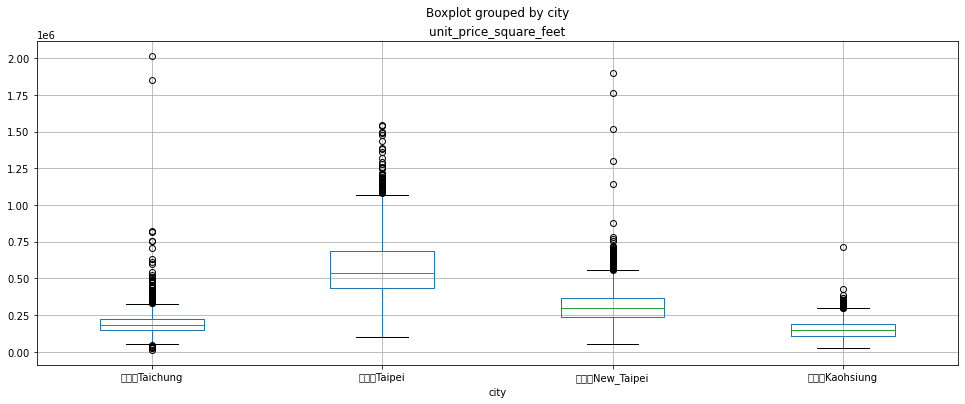

In [15]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
Data_Use.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

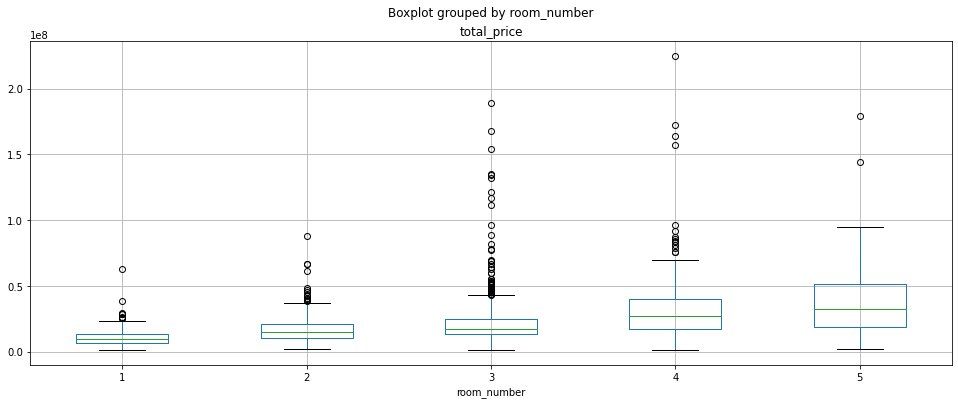

In [16]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
Data_Use.loc[Data_Use.city=='台北市Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

In [17]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(Data_Use['towns'].values)
Data_Use['towns_2'] = le.transform(Data_Use['towns'].values)

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

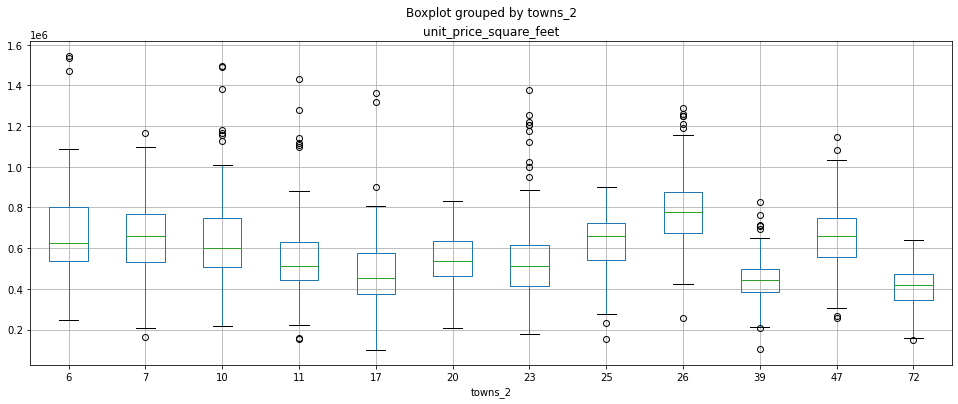

In [18]:
Data_Use.loc[Data_Use.city=='台北市Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

In [19]:
le.inverse_transform([25])

array(['大同區'], dtype=object)